# Esercizio 11.1

In [146]:
#f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3 
c = -2
d = 3

In [147]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c * x_train * x_train + d * x_train * x_train * x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid, sigma)

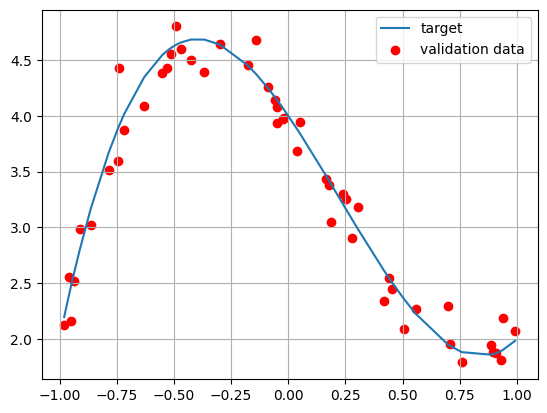

In [148]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu')) # input layer with one neuron and linear activation
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [150]:
# get a summary of our composed model
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3532 - mse: 11.3532 - val_loss: 8.8460 - val_mse: 8.8460
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8278 - mse: 8.8278 - val_loss: 5.8213 - val_mse: 5.8213
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2150 - mse: 5.2150 - val_loss: 2.7242 - val_mse: 2.7242
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6404 - mse: 2.6404 - val_loss: 1.2100 - val_mse: 1.2100
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0736 - mse: 1.0736 - val_loss: 1.0492 - val_mse: 1.0492
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7929 - mse: 0.7929 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6226 - mse: 0.6226 - val_loss: 0.6863 - val_mse: 0.6863
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5089 - mse: 0.5089 - val_loss: 0.5627 - val_mse: 0.5627
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4

In [152]:
# return weights and biases
model.get_weights()

[array([[ 0.28881985,  0.25778157,  0.2884759 , -0.4764024 ,  0.30151898,
         -0.01971223,  0.6277653 ,  0.3732398 ,  0.27768427, -0.05491467,
          0.35000145, -0.07493121,  0.33456662, -0.32745928,  0.5221945 ,
         -0.32481316,  0.25122416,  0.27668834, -0.3563473 ,  0.21986263,
         -0.3428434 ,  0.14439102, -0.26136926, -0.42135376, -0.27371016,
          0.5653813 ,  0.24330589, -0.0248252 ,  0.2711656 , -0.30596808,
          0.27321798,  0.19195719]], dtype=float32),
 array([ 0.28539288,  0.25486678,  0.2850535 , -0.24676768,  0.29875624,
        -0.02906403,  0.1749669 ,  0.08969348,  0.27459094,  0.1889694 ,
         0.16641074,  0.15577346,  0.18092063,  0.20399326,  0.12489812,
         0.20239727,  0.24807677,  0.27363625,  0.13747613,  0.2172297 ,
         0.21355373,  0.18253228,  0.163096  ,  0.18576843,  0.17022802,
         0.26814198,  0.24037318,  0.19626194,  0.26760688,  0.19068016,
         0.26962885,  0.2241468 ], dtype=float32),
 array([[ 0.36

In [153]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0359 - mse: 0.0359

Test loss: 0.03486035764217377
Test accuracy: 0.03486035764217377


In [154]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mse: 0.0033

Test loss: 0.0031346320174634457
Test accuracy: 0.0031346320174634457


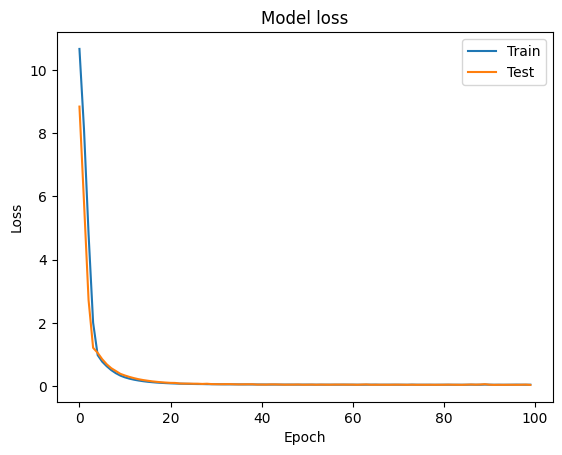

In [155]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


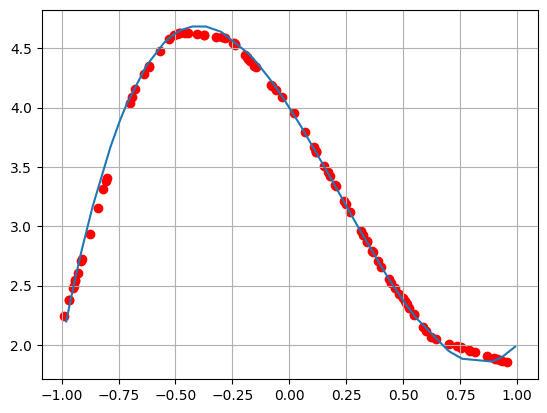

In [156]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()